In [ ]:
pip install porter-stemmer-py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for porter-stemmer-py: filename=porter_stemmer_py-1.1.5-py3-none-any.whl size=8463 sha256=8c77ccfd29caccd6a3f58c0e4d8503d3d1b816b047509fd416d2a856635fc71b
  Stored in directory: /root/.cache/pip/wheels/be/fd/81/dd98aa97d87d22c0820e8a620467c56150fc48fbc423e7469c
Successfully built porter-stemmer-py


part2. taking a document

In [ ]:
with open ('mdoc.txt') as f:
    d1=f.read()
d1

'Colonial India was the part of the Indian subcontinent that was occupied by European colonial powers during the Age of Discovery. European power was exerted both by conquest and trade, especially in spices.[1][2] The search for the wealth and prosperity of India led to the colonisation of the Americas after Christopher Columbus went to the Americas in 1492. Only a few years later, near the end of the 15th century, Portuguese sailor Vasco da Gama became the first European to re-establish direct trade links with India since Roman times by being the first to arrive by circumnavigating Africa (c. 1497–1499). Having arrived in Calicut, which by then was one of the major trading ports of the eastern world,[3] he obtained permission to trade in the city from the Saamoothiri Rajah. The next to arrive were the Dutch, with their main base in Ceylon. Their expansion into India was halted after their defeat in the Battle of Colachel by the Kingdom of Travancore, during the Travancore–Dutch War.\n

part3. remove stopwords

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RegexpStemmer
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokens: ['colonial', 'india', 'was', 'the', 'part', 'of', 'the', 'indian', 'subcontinent', 'that', 'was', 'occupied', 'by', 'european', 'colonial', 'powers', 'during', 'the', 'age', 'of', 'discovery', '.', 'european', 'power', 'was', 'exerted', 'both', 'by', 'conquest', 'and', 'trade', ',', 'especially', 'in', 'spices', '.', '[', '1', ']', '[', '2', ']', 'the', 'search', 'for', 'the', 'wealth', 'and', 'prosperity', 'of', 'india', 'led', 'to', 'the', 'colonisation', 'of', 'the', 'americas', 'after', 'christopher', 'columbus', 'went', 'to', 'the', 'americas', 'in', '1492.', 'only', 'a', 'few', 'years', 'later', ',', 'near', 'the', 'end', 'of', 'the', '15th', 'century', ',', 'portuguese', 'sailor', 'vasco', 'da', 'gama', 'became', 'the', 'first', 'european', 'to', 're-establish', 'direct', 'trade', 'links', 'with', 'india', 'since', 'roman', 'times', 'by', 'being', 'the', 'first', 'to', 'arrive', 'by', 'circumnavigating', 'africa', '(', 'c.', '1497–1499', ')', '.', 'having', 'arrived', 'i

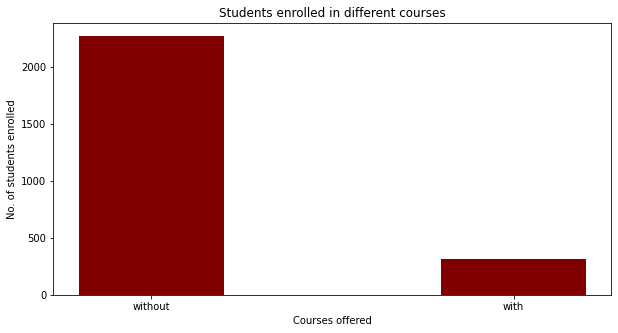

In [ ]:
tokens = word_tokenize(d1.lower())
print("Tokens:", tokens)
english_stopwords= [ 'stop', 'the', 'to', 'and', 'a', 'in', 'it', 'is', 'I', 'that', 'had', 'on', 'for', 'were', 'was','by','of']
tokens_wo_stopwords = [t for t in tokens if t not in english_stopwords]
print("")
print("---------------------------------------------")
print("---------------------------------------------")
print("length with stopwords:", len(d1))
print("---------------------------------------------")
print("length without stopwords:", len(tokens_wo_stopwords))
print("---------------------------------------------")
print("---------------------------------------------")
print(tokens_wo_stopwords)

# creating the dataset
data = {'without':2268, 'with':318}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()


part4. finding stems with porter stemmer

In [ ]:
words = tokens_wo_stopwords
for word in words:
  print(word,"--->",regexp.stem(word))

colonial ---> colonial
india ---> india
part ---> part
indian ---> indian
subcontinent ---> subcontinent
occupied ---> occupied
european ---> european
colonial ---> colonial
powers ---> power
during ---> dur
age ---> age
discovery ---> discovery
. ---> .
european ---> european
power ---> power
exerted ---> exerted
both ---> both
conquest ---> conquest
trade ---> trad
, ---> ,
especially ---> especially
spices ---> spice
. ---> .
[ ---> [
1 ---> 1
] ---> ]
[ ---> [
2 ---> 2
] ---> ]
search ---> search
wealth ---> wealth
prosperity ---> prosperity
india ---> india
led ---> led
colonisation ---> colonisation
americas ---> america
after ---> after
christopher ---> christopher
columbus ---> columbu
went ---> went
americas ---> america
1492. ---> 1492.
only ---> only
few ---> few
years ---> year
later ---> later
, ---> ,
near ---> near
end ---> end
15th ---> 15th
century ---> century
, ---> ,
portuguese ---> portugues
sailor ---> sailor
vasco ---> vasco
da ---> da
gama ---> gama
became ---> 

In [ ]:
word_freq=[tokens_wo_stopwords.count(p) for p in tokens_wo_stopwords]
print("The frequency of words is ...")
mydict= dict(zip(tokens_wo_stopwords,word_freq))
print(dict(zip(tokens_wo_stopwords,word_freq)))

The frequency of words is ...
{'colonial': 2, 'india': 8, 'part': 2, 'indian': 6, 'subcontinent': 3, 'occupied': 1, 'european': 5, 'powers': 3, 'during': 2, 'age': 1, 'discovery': 1, '.': 14, 'power': 2, 'exerted': 1, 'both': 1, 'conquest': 1, 'trade': 3, ',': 18, 'especially': 1, 'spices': 1, '[': 3, '1': 1, ']': 3, '2': 1, 'search': 1, 'wealth': 1, 'prosperity': 1, 'led': 1, 'colonisation': 1, 'americas': 2, 'after': 3, 'christopher': 1, 'columbus': 1, 'went': 1, '1492.': 1, 'only': 1, 'few': 1, 'years': 1, 'later': 2, 'near': 1, 'end': 1, '15th': 1, 'century': 6, 'portuguese': 1, 'sailor': 1, 'vasco': 1, 'da': 1, 'gama': 1, 'became': 3, 'first': 2, 're-establish': 1, 'direct': 3, 'links': 1, 'with': 2, 'since': 1, 'roman': 1, 'times': 1, 'being': 1, 'arrive': 2, 'circumnavigating': 1, 'africa': 1, '(': 1, 'c.': 1, '1497–1499': 1, ')': 1, 'having': 1, 'arrived': 1, 'calicut': 1, 'which': 2, 'then': 2, 'one': 1, 'major': 1, 'trading': 3, 'ports': 1, 'eastern': 1, 'world': 1, '3': 1, '

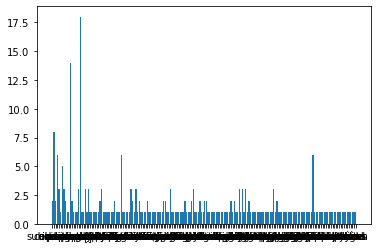

In [ ]:
names = list(mydict.keys())
values = list(mydict.values())

plt.bar(range(len(mydict)), values, tick_label=names)
plt.show()

Part6. Implementing two new rules for any two incorrect stems

In [ ]:
import nltk
from nltk.metrics.distance  import edit_distance
from nltk.util import ngrams
nltk.download('words')
from nltk.corpus import words
correct_words = words.words()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
correct_words

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [ ]:
incorrect_words=['dur', 'azmaing', 'intelliengt','empir','becam','valu']
for word in incorrect_words:
    temp = [(edit_distance(word, w),w) for w in correct_words if w[0]==word[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])

during
amazing
intelligent
empire
became
value


part7. validate

In [ ]:
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
incorrect_words=['during', 'azmaing', 'intelliengt','empir','became','valu']
for word in incorrect_words:
    temp = [(jaccard_distance(set(ngrams(word, 2)),
                              set(ngrams(w, 2))),w)
            for w in correct_words if w[0]==word[0]]
    print(sorted(temp, key = lambda val:val[0])[0][1])

dura
amazing
intelligent
empire
becap
value
